In [1]:
import sklearn
sklearn.__version__

'0.22.1'

In [2]:
# load_digits
from sklearn import datasets
mnist = datasets.load_digits()  # sklearn.utils.Bunch
mnist.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
print(mnist.get('DESCR'))

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
mnist.data.shape

(1797, 64)

In [5]:
mnist.images.shape

(1797, 8, 8)

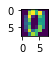

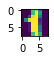

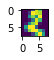

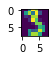

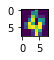

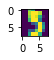

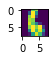

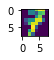

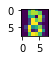

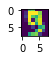

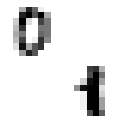

In [6]:
import matplotlib.pyplot as plt
for i in range(10):
    plt.figure(figsize=(1/2, 1/2))
    plt.imshow(mnist.images[i])
    plt.show()


plt.figure(figsize=(2, 2))
plt.subplot(2, 2, 1)
plt.imshow(mnist.images[0], cmap='gray_r')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(mnist.images[1], cmap='gray_r')
plt.axis('off')
plt.show()

In [7]:
# z-score
# z = (x - μ) / σ
from sklearn.preprocessing import StandardScaler
import numpy as np
np.random.seed(1234)
rdata = np.random.randint(150, 190, size=100)
zscore = StandardScaler()
zscore.fit_transform(rdata.reshape(-1, 1)).ravel()

array([ 0.00435876,  1.66068653, -0.60586726,  0.44023449, -0.34434183,
        0.35305934,  0.61458478,  0.96328536,  0.96328536,  0.61458478,
        0.78893507, -1.21609328, -0.25716668, -0.8673927 , -0.60586726,
        1.57351138,  1.31198594,  1.66068653, -1.39044357,  1.74786167,
       -0.69304241, -1.65196901, -0.69304241, -0.25716668, -1.39044357,
       -1.47761872,  0.00435876, -0.60586726, -1.56479387, -0.69304241,
       -0.16999153, -0.43151697, -1.04174299,  0.78893507, -0.16999153,
        0.35305934, -0.51869212,  1.13763565, -0.60586726, -1.21609328,
        1.05046051,  1.57351138,  1.05046051,  0.52740963,  0.0915339 ,
       -0.25716668, -0.95456785, -1.12891814,  0.26588419,  0.61458478,
        0.00435876, -0.08281639,  0.17870905,  1.31198594,  1.57351138,
        1.66068653, -1.04174299,  1.48633623, -1.39044357, -1.21609328,
       -0.34434183,  1.31198594, -0.78021755,  0.78893507, -1.30326843,
       -0.08281639,  1.74786167,  0.52740963, -0.43151697,  0.35

In [8]:
# load_iris
import pandas as pd
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
target = iris.target
name = iris.target_names

# 手動分類
np.random.seed(4)  # 剛好 8:2
selected = np.random.choice([0, 1], size=150, p=[0.8, 0.2])
print(np.bincount(selected))

# 將 data + target 組合成為一個 DataFrame
df = pd.DataFrame(data, columns=['sepallength',
                                 'sepalwidth', 'petallength', 'petalwidth'])
df['class'] = target
df['selected'] = selected
df[df.selected == 0]  # 訓練資料
df[df.selected == 1]  # 測試資料

df[df.selected == 0].iloc[:, -2].values

data_train, target_train, data_test, target_test = df[df.selected == 0].iloc[:, :4].values, \
    df[df.selected == 0].iloc[:, -2].values, \
    df[df.selected == 1].iloc[:, :4].values, \
    df[df.selected == 1].iloc[:, -2].values
data_train.shape, target_train.shape, data_test.shape, target_test.shape

[120  30]


((120, 4), (120,), (30, 4), (30,))

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [14]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=400)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
print(np.sum(clf.predict(data_train) == target_train) / len(data_train))
print(np.sum(clf.predict(data_test) == target_test) / len(data_test))

0.975
1.0


# 多種演算法

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
#clf = LogisticRegression()
#clf = KNeighborsClassifier()
#clf = DecisionTreeClassifier(criterion='entropy', max_depth=5)
#clf = BernoulliNB()
#clf = AdaBoostClassifier()
clf = RandomForestClassifier()
clf.fit(data_train, target_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Perceptron

In [17]:
import numpy as np


class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])  # array([0., 0., 0., 0., 0.])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            #print(_ ,'th', self.w_)
            for xi, target in zip(X, y):      # 每次取出 第 i row的 X
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi    # 多少欄位 特徵值 花萼長度 + 花瓣長度
                self.w_[0] += update          # 固定的 w0 權重
                errors += int(update != 0.0)  # 如果預測跟原先的y值 不同就紀錄起來多少錯誤
            self.errors_.append(errors)       # 最後計算結果 就會記錄到 erros_ list
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Final [-2.48   1.58  -2.014]


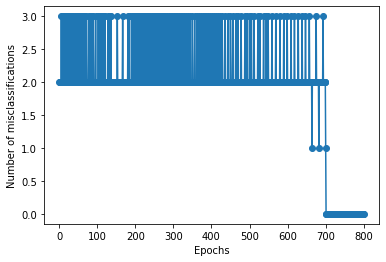

In [24]:
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
X = df.iloc[0:100, [0, 1]].values  # 取出 花萼長 花萼寬 花瓣長 花瓣寬
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

ppn = Perceptron(eta=0.01, n_iter=800)
ppn.fit(X, y)

print('Final', ppn.w_)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [26]:
# 預測 使用原先的100筆數據去預測
np.sum(ppn.predict(X) == y) / len(y) * 100

100.0

## 標準化會快速收斂

In [27]:
X = df.iloc[0:100, [0, 1]].values
# 手動zscore x-u / s
u = np.mean(X, axis=0)
s = np.std(X, axis=0)
Xz = (X - u) / s
np.mean(Xz, axis=0), np.std(Xz, axis=0)

(array([-1.51822999e-15,  2.88657986e-16]), array([1., 1.]))

Final [ 0.02        0.07921917 -0.05885945]


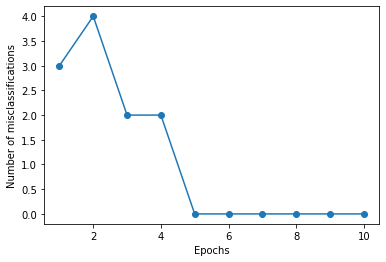

100.0

In [28]:
ppn = Perceptron(eta=0.01, n_iter=10)
ppn.fit(Xz, y)

print('Final', ppn.w_)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

# 預測 使用原先的100筆數據去預測
np.sum(ppn.predict(Xz) == y) / len(y) * 100

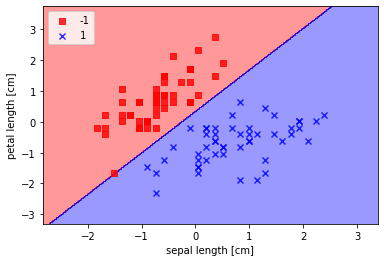

In [29]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    color=cmap(idx), marker=markers[idx], label=cl)


# 注意數據要跟當初train 一樣，不然 model 會產生不同結果
plot_decision_regions(Xz, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [69]:
x, y = np.meshgrid(np.arange(0, 2, 1), np.arange(-2, 0, 1))

In [70]:
x, y

(array([[0, 1],
        [0, 1]]),
 array([[-2, -2],
        [-1, -1]]))

In [60]:
x.shape, y.shape

((2, 2), (2, 2))

In [71]:
nx, ny = (3, 2)
x = np.linspace(0, 1, 3)
y = np.linspace(0, 1, 2)
xv, yv = np.meshgrid(x, y)

x

array([0. , 0.5, 1. ])

In [72]:
xv, yv

(array([[0. , 0.5, 1. ],
        [0. , 0.5, 1. ]]),
 array([[0., 0., 0.],
        [1., 1., 1.]]))

# LinearRegression

In [75]:
from sklearn.linear_model import LinearRegression
import pandas as pd

df = pd.read_csv('Lemonade.csv')
X, y = df[['Temperature', 'Rainfall', 'Flyers', 'Price']
          ].values, df[['Sales']].values

reg = LinearRegression()
reg.fit(X, y)
reg.score(X, y) * 100

98.20616752714092

# Classification

## LogisticRegression

In [92]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()
X, y = iris.data, iris.target

clf = LogisticRegression(max_iter=400)
clf.fit(X, y)
clf.score(X, y) * 100

97.33333333333334

In [114]:
import numpy as np
import pandas as pd

df_pred = pd.DataFrame(np.hstack([clf.predict(X).reshape(-1, 1), y.reshape(-1, 1)]),
                       columns=['predict', 'truth'])
df_pred['diff'] = (df_pred.predict == df_pred.truth).astype('int')
df_pred[df_pred['diff'] == 0]

,predict,truth,diff
70,2,1,0
77,2,1,0
83,2,1,0
106,1,2,0


## KNeighborsClassifier

In [11]:
from sklearn import datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [12]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
clf.score(X, y) * 100

100.0

In [13]:
clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

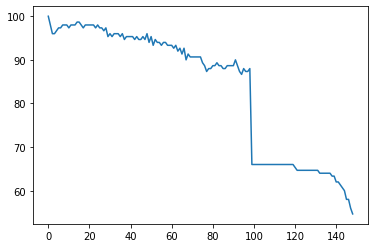

In [14]:
import matplotlib.pyplot as plt


def knn(n):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X, y)
    return(clf.score(X, y) * 100)


# 看 n_neighbors 精準度
score = [knn(n) for n in range(1, 150)]

plt.plot(score)
plt.show()

# One Hot Encoding

In [139]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [153]:
from keras.utils import to_categorical
to_categorical(y)

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [157]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
data = ohe.fit_transform(y.reshape(-1, 1))
data.toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

# Feature selection


In [159]:
# 降低維度 可以加速運算 避免 overfitting 快速收斂
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
features_pca = pca.fit_transform(X)

In [161]:
from sklearn import datasets
iris = datasets.load_iris()

In [165]:
import pandas as pd
X = pd.DataFrame(iris.data, columns=['sepal length (cm)',
                                     'sepal width (cm)',
                                     'petal length (cm)',
                                     'petal width (cm)'])

y = iris.target

In [166]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=100)
clf.fit(features_pca, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [170]:
# 使用 isomaps 降低維度
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import Isomap
iso = Isomap(n_components=1)
features_iso = iso.fit_transform(X.iloc[:, [0, 1, 2, 3]])

clf = LogisticRegression(max_iter=100)
clf.fit(features_iso, y)
clf.score(features_iso, y)

0.86

In [171]:
# https://scikit-learn.org/0.16/modules/generated/sklearn.lda.LDA.html
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
lda.fit_transform(X.iloc[:, [0, 1, 2, 3]], y)

array([[ 8.06179978e+00,  3.00420621e-01],
       [ 7.12868772e+00, -7.86660426e-01],
       [ 7.48982797e+00, -2.65384488e-01],
       [ 6.81320057e+00, -6.70631068e-01],
       [ 8.13230933e+00,  5.14462530e-01],
       [ 7.70194674e+00,  1.46172097e+00],
       [ 7.21261762e+00,  3.55836209e-01],
       [ 7.60529355e+00, -1.16338380e-02],
       [ 6.56055159e+00, -1.01516362e+00],
       [ 7.34305989e+00, -9.47319209e-01],
       [ 8.39738652e+00,  6.47363392e-01],
       [ 7.21929685e+00, -1.09646389e-01],
       [ 7.32679599e+00, -1.07298943e+00],
       [ 7.57247066e+00, -8.05464137e-01],
       [ 9.84984300e+00,  1.58593698e+00],
       [ 9.15823890e+00,  2.73759647e+00],
       [ 8.58243141e+00,  1.83448945e+00],
       [ 7.78075375e+00,  5.84339407e-01],
       [ 8.07835876e+00,  9.68580703e-01],
       [ 8.02097451e+00,  1.14050366e+00],
       [ 7.49680227e+00, -1.88377220e-01],
       [ 7.58648117e+00,  1.20797032e+00],
       [ 8.68104293e+00,  8.77590154e-01],
       [ 6.

In [184]:
# sklearn wine
from sklearn import datasets
wine = datasets.load_wine()
X, y = wine.data, wine.target
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

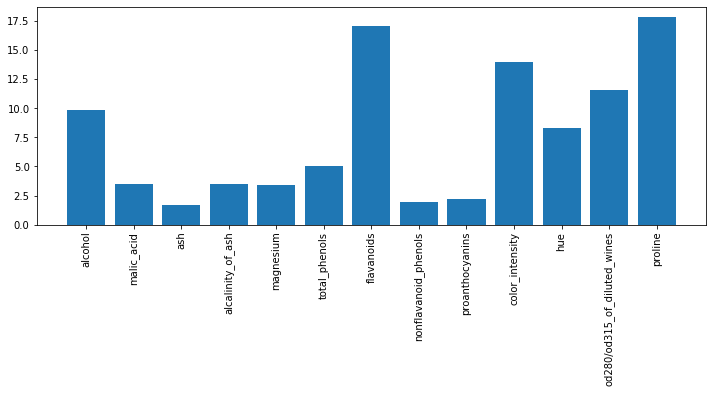

In [188]:
# feature importance
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X, y)
clf.score(X, y)

plt.figure(figsize=(12, 4))
plt.bar(np.array(wine.feature_names), clf.feature_importances_*100)
plt.xticks(rotation=90)
plt.show()

In [200]:
# 對 feature_importances_ 降序
import pandas as pd
score = pd.DataFrame(wine.feature_names, columns=['feature_names'])
score['feature_importances_'] = clf.feature_importances_*100
score.sort_values('feature_importances_', ascending=False)

,feature_names,feature_importances_
12,proline,17.831307
6,flavanoids,17.127560
9,color_intensity,13.987579
11,od280/od315_of_diluted_wines,11.615664
0,alcohol,9.851043
10,hue,8.279479
5,total_phenols,5.040023
3,alcalinity_of_ash,3.514447
1,malic_acid,3.491384
4,magnesium,3.412573


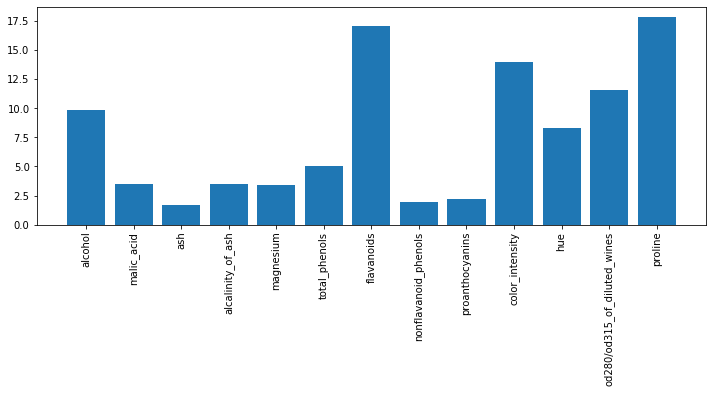

In [201]:
plt.figure(figsize=(12, 4))
plt.bar(score.feature_names, score.feature_importances_)
plt.xticks(rotation=90)
plt.show()

# AdalineGD

In [5]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)  # 結果是一個向量
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,
            # in the case of logistic regression (as we will see later),
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [6]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
X, y = iris.data[:100][:, [0, 2]], np.where(iris.target[:100] == 1, 1, -1)

In [7]:
ada1 = AdalineGD(n_iter=10, eta=0.0001)
ada1.fit(X, y)
np.log(ada1.cost_)

array([3.93342717, 3.88633982, 3.85574191, 3.83127008, 3.80904985,
       3.78766332, 3.76659584, 3.74566136, 3.72479289, 3.70396658])

In [8]:
ada1.predict(X)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

# pipeline

In [15]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

iris = datasets.load_iris()
X, y = iris.data, iris.target

pl = make_pipeline(StandardScaler(),
                   PCA(n_components=3),
                   RandomForestClassifier(n_estimators=6))
pl.fit(X, y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=3,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                     

In [16]:
pl.score(X, y), X.shape, y.shape

(1.0, (150, 4), (150,))

In [17]:
pl.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

[[1.         0.9       ]
 [0.975      0.83333333]
 [0.99166667 0.93333333]]


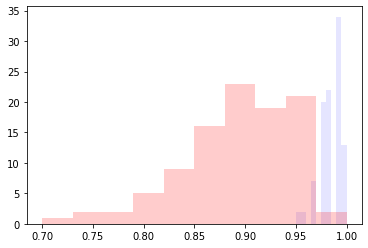

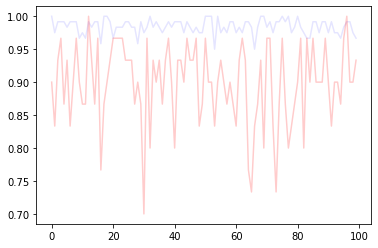

In [39]:
# RUN 一百次 檢視 train vs test 的結果分布
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import numpy as np

X, y = iris.data, iris.target
result = np.zeros((100, 2))

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    pl = make_pipeline(StandardScaler(),
                       PCA(n_components=3),
                       RandomForestClassifier(n_estimators=4))
    pl.fit(X_train, y_train)
    result[i] = pl.score(X_train, y_train), pl.score(X_test, y_test)

print(result[:3])

%matplotlib inline
plt.hist(result[:, 0], color='blue', alpha=0.1)
plt.hist(result[:, 1], color='red', alpha=0.2)
plt.show()

plt.plot(result[:, 0], color='blue', alpha=0.1)
plt.plot(result[:, 1], color='red', alpha=0.2)
plt.show()

# KFold

In [50]:
# index 取資料
import numpy as np
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)
kf.get_n_splits(X)

print(kf)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

KFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


# VotingClassifier

In [56]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
X, y = iris.data, iris.target  # numpy array


# X = pd.DataFrame(iris.data, columns=['sepal length (cm)',
#                                      'sepal width (cm)',
#                                      'petal length (cm)',
#                                      'petal width (cm)'])
# y = pd.DataFrame(iris.target)

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y.ravel(), test_size=0.2, random_state=42)


estimators = [('dt', DecisionTreeClassifier()),
              ('gnb', GaussianNB()),
              ('lr', LogisticRegression(solver='lbfgs', max_iter=400))]

# VotingClassifier?
clf = VotingClassifier(estimators, voting='soft')
clf.fit(X_train, y_train)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=None,
   

# naive_bayes

In [67]:
import numpy as np
from sklearn.datasets import load_wine as wine

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(wine().data, wine().target,
                                                    test_size=0.2, random_state=42)

clf1 = BernoulliNB()
clf2 = GaussianNB()
clf3 = MultinomialNB()

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)

clf1.score(X_test, y_test), clf2.score(
    X_test, y_test), clf3.score(X_test, y_test)

(0.3888888888888889, 1.0, 0.8888888888888888)

# neural_network

In [68]:
from sklearn import datasets
wine = datasets.load_wine()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [69]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target,
                                                    test_size=0.2, random_state=42)

clf = MLPClassifier(hidden_layer_sizes=(500,), max_iter=1000)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9722222222222222

# cluster

In [12]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=['sepal length (cm)',
                                      'sepal width (cm)',
                                      'petal length (cm)',
                                      'petal width (cm)'])
df['target'] = iris.target

In [13]:
X, y = df.iloc[:, [0, 1, 2, 3]].values, df.iloc[:, [-1]].values.flatten()

In [18]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=3)
clf.fit(X, y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
df['cluster'] = clf.predict(X)
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0
